In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy  as np
import pandas as pd
import seaborn as sns
import re
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
dtypes = {'issue_d': 'str', 'last_pymnt_d': 'str'}
parse_dates = ['issue_d', 'last_pymnt_d']
accepted = pd.read_csv("C:\\Users\\nilli\\Downloads\\accepted_b_2015_clean.csv",
                       dtype=dtypes, parse_dates=parse_dates)

In [3]:
# accepted.columns

In [4]:
accepted.select_dtypes(include = 'object').columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'loan_status', 'pymnt_plan',
       'url', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_credit_pull_d', 'application_type',
       'hardship_flag', 'disbursement_method', 'debt_settlement_flag'],
      dtype='object')

In [5]:
accepted["term"] = accepted["term"].apply(lambda x: re.sub('months', '',x)).astype('int64')  

In [6]:
accepted["emp_length"] = accepted['emp_length'].apply(lambda x: re.sub('years', '',x))#.astype('int64')

In [7]:
accepted["emp_length"] = accepted['emp_length'].apply(lambda x: re.sub('year', '',x))

In [8]:
accepted["emp_length"] = accepted['emp_length'].apply(lambda x: re.sub('< 1 ', '0',x))

In [9]:
accepted["emp_length"] = accepted["emp_length"].str.replace(r'\D', '', ).astype('int64')

In [10]:
# accepted["emp_length"].unique()
accepted["emp_length"].value_counts()/ len(accepted['emp_length'])

10    0.319656
2     0.134311
3     0.078722
0     0.078045
5     0.066406
1     0.063732
4     0.060294
6     0.056297
7     0.056264
8     0.048055
9     0.038217
Name: emp_length, dtype: float64

In [11]:
accepted["emp_length"].describe()

count    453647.000000
mean          5.798310
std           3.637896
min           0.000000
25%           2.000000
50%           6.000000
75%          10.000000
max          10.000000
Name: emp_length, dtype: float64

In [12]:
#Let's create categories for annual_income since most of the bad loans are located below 100k
accepted['employ_cat'] = np.nan
lst = [accepted]

for col in lst:
    col.loc[col["emp_length"] <3, 'employ_cat'] = 'under_three'
    col.loc[(col["emp_length"] >= 3) & (col["emp_length"] <= 9), 'employ_cat'] = 'between_three_ten'
    col.loc[col["emp_length"] >= 10, 'employ_cat'] = 'Over_ten'

In [13]:
accepted['employ_cat'].value_counts()

between_three_ten    183389
Over_ten             145011
under_three          125247
Name: employ_cat, dtype: int64

In [14]:
# job_status =[ 8, 10,  0,  6,  2,  7,  9,  4,  5,  3,  1]
# accepted["job_length"] = np.nan

# def emp_condition(status):
#     for job in job_status:
#         if(accepted["emp_length"] <1):
#             return 'under_one'
#         elif(accepted["emp_length"] == 10):
#             return 'Over_ten'
#         else:
#             return 'between_one_ten'
    
# accepted["job_length"] = accepted["emp_length"].apply(emp_condition)   
# #     accepted['loan_completion'] = np.nan

# def loan_condition(status):
#     if status in default_cat_severe:
#         return 'Noncompleted Loan'
#     else:
#         return 'Completed Loan'


# accepted['loan_completion'] = accepted['loan_status'].apply(loan_condition)


# df['interest_payments'] = np.nan
# lst = [df]

# for col in lst:
#     col.loc[col['interest_rate'] <= 13.23, 'interest_payments'] = 'Low'
#     col.loc[col['interest_rate'] > 13.23, 'interest_payments'] = 'High'

# employment_length = ['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
#                     '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a']

# Create a new column and convert emp_length to integers.

# lst = [df]
# df['emp_length_int'] = np.nan

# for col in lst:
#     col.loc[col['emp_length'] == '10+ years', "emp_length_int"] = 10
#     col.loc[col['emp_length'] == '9 years', "emp_length_int"] = 9
#     col.loc[col['emp_length'] == '8 years', "emp_length_int"] = 8
#     col.loc[col['emp_length'] == '7 years', "emp_length_int"] = 7
#     col.loc[col['emp_length'] == '6 years', "emp_length_int"] = 6
#     col.loc[col['emp_length'] == '5 years', "emp_length_int"] = 5
#     col.loc[col['emp_length'] == '4 years', "emp_length_int"] = 4
#     col.loc[col['emp_length'] == '3 years', "emp_length_int"] = 3
#     col.loc[col['emp_length'] == '2 years', "emp_length_int"] = 2
#     col.loc[col['emp_length'] == '1 year', "emp_length_int"] = 1
#     col.loc[col['emp_length'] == '< 1 year', "emp_length_int"] = 0.5
#     col.loc[col['emp_length'] == 'n/a', "emp_length_int"] = 0

In [15]:
#Let's create categories for annual_income since most of the bad loans are located below 100k
accepted['income_cat'] = np.nan
lst = [accepted]

for col in lst:
    col.loc[col['annual_inc'] <= 100000, 'income_cat'] = 'Low'
    col.loc[(col['annual_inc'] > 100000) & (col['annual_inc'] <= 200000), 'income_cat'] = 'Medium'
    col.loc[col['annual_inc'] > 200000, 'income_cat'] = 'High'

In [16]:
accepted['income_cat'].value_counts()

Low       378514
Medium     67606
High        7527
Name: income_cat, dtype: int64

In [17]:
accepted['issue_d'].head()
dt_series = pd.to_datetime(accepted['issue_d'])
accepted['year'] = dt_series.dt.year

In [18]:
accepted.groupby(['income_cat', 'purpose'], as_index=False).int_rate.mean()
group_dti_purpose = accepted.groupby(['income_cat', 'purpose'], as_index=False).funded_amnt.mean()
loan_a = group_dti_purpose['funded_amnt'].values

In [19]:
group_dti_purpose 

,income_cat,purpose,funded_amnt
0,High,car,14267.857143
1,High,credit_card,25292.954244
2,High,debt_consolidation,24798.220043
3,High,educational,11000.000000
4,High,home_improvement,23745.907738
5,High,house,26466.304348
6,High,major_purchase,19280.585106
7,High,medical,17331.701031
8,High,moving,19066.363636
9,High,other,20982.611111


In [20]:
accepted.groupby(['income_cat', 'purpose'], as_index=False).int_rate.mean()

,income_cat,purpose,int_rate
0,High,car,10.453000
1,High,credit_card,11.792971
2,High,debt_consolidation,13.412477
3,High,educational,11.420000
4,High,home_improvement,13.035308
5,High,house,15.745362
6,High,major_purchase,12.733777
7,High,medical,14.969691
8,High,moving,16.211273
9,High,other,15.770333


In [21]:
dc= accepted[['term', 'grade', "emp_length",'purpose','year','income_cat']]
dc

,term,grade,emp_length,purpose,year,income_cat
0,36,A,8,credit_card,2014,Low
1,60,C,10,debt_consolidation,2014,Low
2,36,C,10,debt_consolidation,2014,Low
3,36,C,0,debt_consolidation,2014,Low
4,60,D,6,credit_card,2014,Low
...,...,...,...,...,...,...
453642,36,D,7,debt_consolidation,2012,Low
453643,36,C,3,small_business,2012,Low
453644,36,C,3,small_business,2012,Medium
453645,36,D,2,other,2012,Low


In [22]:
accepted.select_dtypes(include = ['int64', 'float64']).columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_acct

In [23]:
accepted['fico_mid'] = (accepted['fico_range_high'] + accepted['fico_range_low'])/2

In [24]:
# dn =accepted[['funded_amnt','int_rate','annual_inc','term', 'dti','delinq_2yrs', 'fico_mid']]
dn =accepted[['funded_amnt','int_rate','annual_inc','term', 'dti', 'fico_mid']]

In [25]:
dn.corr()

,funded_amnt,int_rate,annual_inc,term,dti,fico_mid
funded_amnt,1.000000,0.163956,0.371911,0.401712,0.053609,0.102555
int_rate,0.163956,1.000000,-0.046972,0.445421,0.157369,-0.502134
annual_inc,0.371911,-0.046972,1.000000,0.067911,-0.189287,0.094710
term,0.401712,0.445421,0.067911,1.000000,0.081117,-0.004186
dti,0.053609,0.157369,-0.189287,0.081117,1.000000,-0.111699
fico_mid,0.102555,-0.502134,0.094710,-0.004186,-0.111699,1.000000


In [26]:
grade_ord = {'A': 7,'B': 6,'C': 5,'D': 4,'E': 3,'F': 2,'G': 1}
accepted['grade']= accepted['grade'].map(grade_ord)               

In [27]:
# accepted['grade'] = gradeo

In [28]:
income_cat_ord = {'Low':1, 'Medium':2, 'High':3}
accepted['income_cat'] = accepted['income_cat'].map(income_cat_ord) 

In [29]:
df =accepted[['funded_amnt','int_rate','annual_inc','term', 'dti','delinq_2yrs', 
               'fico_mid','grade', "emp_length",'purpose']]



In [30]:
from sklearn.preprocessing import OneHotEncoder

#dummify purpose column
purpose_ohe = OneHotEncoder( drop='first', sparse = False )
purpose_enc = purpose_ohe.fit_transform( df[['purpose']] )
purpose_enc = pd.DataFrame( purpose_enc, columns=purpose_ohe.get_feature_names(['purpose']) )
df = pd.concat( (df.drop(["purpose"], axis=1).reset_index(drop = True), purpose_enc), axis = 1 )


In [31]:
df.head()

,funded_amnt,int_rate,annual_inc,term,dti,delinq_2yrs,fico_mid,grade,emp_length,purpose_credit_card,...,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,10400.0,6.99,58000.0,36,14.92,0.0,712.0,7,8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15000.0,12.39,78000.0,60,12.03,0.0,752.0,5,10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9600.0,13.66,69000.0,36,25.81,0.0,682.0,5,10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7650.0,13.66,50000.0,36,34.81,0.0,687.0,5,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,21425.0,15.59,63800.0,60,18.49,0.0,687.0,4,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
df.shape

(453647, 22)

In [33]:
features = df

In [34]:
target =accepted['loan_status']

In [35]:
# from sklearn.preprocessing import StandardScaler
# ss = StandardScaler()
# Xtrain = pd.DataFrame( ss.fit_transform(Xtrain), columns = Xtrain.columns)
# Xtrain.head()

In [36]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, roc_auc_score

In [37]:
Xtrain, Xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=42, stratify = target)

In [38]:
randomForest =RandomForestClassifier(class_weight="balanced",random_state=42)

In [39]:
grid_para_forest = [{
    "n_estimators": [500],
     'max_depth' : [None],
    "criterion": ["gini"],
    'max_features': [6],
    "min_samples_leaf": [ 4],
    "min_samples_split": [  4],
    "random_state": [42]}]

# n_estimators = [100, 300, 500, 800, 1200]
# max_depth = [5, 8, 15, 25, 30]
# min_samples_split = [2, 5, 10, 15, 100]
# min_samples_leaf = [1, 2, 5, 10] 

# max_depth': 12,
#                   'max_features': 'sqrt',
#                   'max_leaf_nodes': None,
#                   'min_impurity_decrease': 0.0,
#                   'min_samples_leaf': 4,
#                   'min_samples_split': 8,
#                   'n_estimators': 1100
grid_search_forest = GridSearchCV(randomForest, grid_para_forest, scoring='accuracy', cv=5, n_jobs=-1)
%time grid_search_forest.fit(Xtrain, ytrain)

Wall time: 27min 17s


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                            

In [40]:
# drf =accepted[['funded_amnt','int_rate','annual_inc','term', 'dti','delinq_2yrs', 
#               'fico_mid','grade', "emp_length",'purpose','income_cat']]


In [41]:
drf=accepted[[ 'funded_amnt',  'term', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths',
       'mths_since_last_delinq', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',  'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_inq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats',  'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit', 'year']]

In [42]:
grid_search_forest.best_params_

{'criterion': 'gini',
 'max_depth': None,
 'max_features': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 500,
 'random_state': 42}

In [43]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(target, grid_search_forest.predict(features))

array([[ 60841,  16656],
       [ 17561, 358589]], dtype=int64)

In [44]:
grid_search_forest.best_score_

0.7941099409949859

In [45]:
grid_search_forest.score(Xtest, ytest)

0.7942466659318859

In [46]:
print(classification_report(ytest, grid_search_forest.predict(Xtest)))

              precision    recall  f1-score   support

   Defaulted       0.36      0.26      0.30     15500
   FullyPaid       0.86      0.90      0.88     75230

    accuracy                           0.79     90730
   macro avg       0.61      0.58      0.59     90730
weighted avg       0.77      0.79      0.78     90730



In [47]:
rocrf=roc_auc_score(ytest, grid_search_forest.predict_proba(Xtest)[:,1])
rocrf

0.6867577141926051

In [48]:
# {'criterion': 'gini',
#  'max_depth': None,
#  'max_features': 6,
#  'min_samples_leaf': 4,
#  'min_samples_split': 4,
#  'n_estimators': 500,
#  'random_state': 42}
randomForest.set_params(random_state=42, n_estimators=500, max_features=6)
randomForest.fit(Xtrain, ytrain) 
randomForest.score(Xtrain, ytrain)

1.0

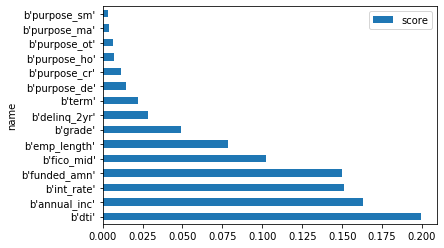

In [49]:
feature_importance = list(zip(Xtrain.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.barh(x='name', y='score')

In [55]:
randomForest.set_params(random_state=42, n_estimators=100, max_features=4)
randomForest.fit(Xtrain, ytrain) 
randomForest.score(Xtrain, ytrain)

0.999977956392233

In [52]:
#  Train model
#randomForest.fit(features, target) 

#test model
randomForest.fit(Xtest, ytest)


# Predict on training set
#pred_y_4 = randomForest.predict(features)

# Predict on test set
pred_y_4 = randomForest.predict(Xtest) 
    
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# ['Defaulted' 'FullyPaid']
 
# How's our accuracy?
from sklearn.metrics import accuracy_score
# print( accuracy_score(target, pred_y_4) )
#0.9999537085002216


print( accuracy_score(ytest, pred_y_4) ) #test set
#0.9999669348616775

from sklearn.metrics import classification_report, roc_auc_score
 
# What about AUROC?
# prob_y_4 = randomForest.predict_proba(features)
# prob_y_4 = [p[1] for p in prob_y_4]
# print( roc_auc_score(target, prob_y_4) )
# 1.0



prob_y_4 = randomForest.predict_proba(Xtest) # test set
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(ytest, prob_y_4) )
# 1.0



['Defaulted' 'FullyPaid']
0.9999669348616775
1.0


In [54]:
print(classification_report(ytest,pred_y_4))

              precision    recall  f1-score   support

   Defaulted       1.00      1.00      1.00     15500
   FullyPaid       1.00      1.00      1.00     75230

    accuracy                           1.00     90730
   macro avg       1.00      1.00      1.00     90730
weighted avg       1.00      1.00      1.00     90730



In [ ]:
feature_importance = list(zip(Xtrain.columns, randomForest.feature_importances_))
dtype = [('feature', 'S10'), ('importance', 'float')]
feature_importance = np.array(feature_importance, dtype=dtype)
feature_sort = np.sort(feature_importance, order='importance')[::-1]
name, score = zip(*list(feature_sort))
pd.DataFrame({'name':name,'score':score})[:15].plot.bar(x='name', y='score')
